可視化方法としては

- 原子の位置は分子内の位置と同じように描画
- ビット情報の中心原子は薄い青丸で表現
- 芳香族原子は黄色い丸で表現
- 環状の脂肪族原子は灰色で表現
- 直接にはフィンガープリントに含まれないが，原子の- 結合タイプ決定に影響する部分を薄い灰色で表現

In [1]:
from rdkit import Chem, rdBase
from rdkit.Chem import Draw, AllChem
import pubchempy as pcp

In [2]:
taxol = pcp.get_compounds('benzylamine','name')
taxol = taxol[0]
taxol = Chem.MolFromSmiles(taxol.canonical_smiles)

In [3]:
print(rdBase.rdkitVersion) ### 2018.09.1

2022.03.5


In [4]:
bitI_morgan = {}
fp_morgan = AllChem.GetMorganFingerprintAsBitVect(taxol, 2, bitInfo=bitI_morgan)

bitI_rdkit = {}
fp_rdkit = AllChem.RDKFingerprint(taxol,bitInfo=bitI_rdkit)


In [5]:
print(fp_morgan.GetNumBits(),fp_morgan.GetNumOnBits()) ### 2048 86
print(len(bitI_morgan)) 

2048 14
14


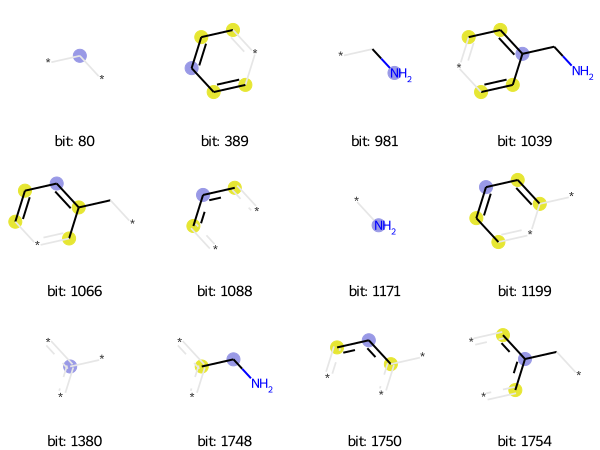

In [6]:
morgan_turples = ((taxol,bit,bitI_morgan) for bit in list(bitI_morgan.keys())[:12])
Draw.DrawMorganBits(morgan_turples, molsPerRow=4, legends=['bit: '+str(x) for x in list(bitI_morgan.keys())[:12]])

# Morganの描画

In [1]:
from rdkit import Chem
mol = Chem.MolFromSmiles('ClC1=CC=C(C(O)=O)C(O)=C1')

In [2]:
from rdkit.Chem import rdMolDescriptors
import numpy as np
import pandas as pd

bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
fp_df = pd.DataFrame([np.array(fp)])

In [3]:
print(len(list(fp.GetOnBits()))) # フィンガープリントの個数の表示
print(list(fp.GetOnBits()))  # フィンガープリントの表示

22
[67, 165, 205, 216, 389, 456, 561, 650, 807, 816, 875, 1047, 1380, 1519, 1602, 1607, 1683, 1750, 1873, 1917, 1991, 2016]


In [4]:
print(fp_df.iloc[:,67:69])
display(fp_df.iloc[:,:])

   67  68
0   1   0


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
len(bi.keys())

22

In [6]:
from IPython.display import SVG

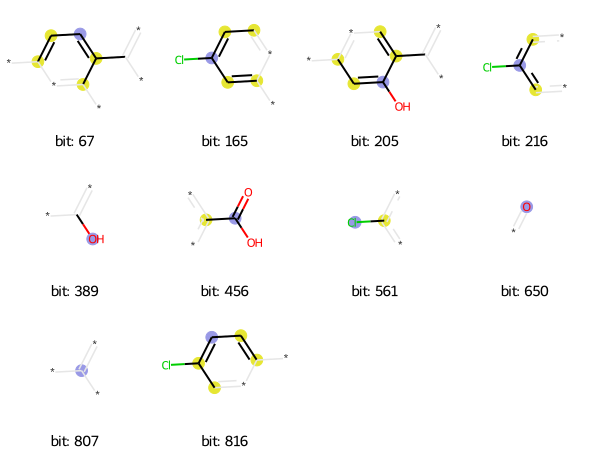

In [9]:
from rdkit.Chem import Draw

morgan_turples = ((mol,key,bi) for key in list(bi.keys())[:10])
Draw.DrawMorganBits(morgan_turples, molsPerRow=4, legends=['bit: '+str(x) for x in list(bi.keys())[:10]])